In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2 
import tensorflow as tf

%matplotlib inline

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)


In [3]:
# train = ImageDataGenerator(
#         rotation_range=45,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='constant',cval=125
#                           )
train = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("images/train",target_size=(200,200),batch_size=3,class_mode='sparse')
val_dataset = train.flow_from_directory("images/test",target_size=(200,200),batch_size=3,class_mode='sparse')

Found 658 images belonging to 3 classes.
Found 293 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
# model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.3))
# # model.add(Dense(64,activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.6))
model.add(Dense(3,activation='softmax'))

In [91]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

history=model.fit(train_dataset,epochs=20,batch_size=16,steps_per_epoch=5,validation_data = val_dataset)

Epoch 1/20
5/5 [==============================] - 2s 332ms/step - loss: 26.2504 - accuracy: 0.4667 - val_loss: 12.1953 - val_accuracy: 0.3276
Epoch 2/20
5/5 [==============================] - 1s 310ms/step - loss: 6.2821 - accuracy: 0.2667 - val_loss: 1.0538 - val_accuracy: 0.3652
Epoch 3/20
5/5 [==============================] - 1s 308ms/step - loss: 1.1717 - accuracy: 0.4667 - val_loss: 0.9437 - val_accuracy: 0.4266
Epoch 4/20
5/5 [==============================] - 1s 309ms/step - loss: 0.6068 - accuracy: 0.6000 - val_loss: 1.2673 - val_accuracy: 0.6416
Epoch 5/20
5/5 [==============================] - 1s 309ms/step - loss: 1.6774 - accuracy: 0.6000 - val_loss: 0.9307 - val_accuracy: 0.6109
Epoch 6/20
5/5 [==============================] - 1s 310ms/step - loss: 0.5106 - accuracy: 0.8667 - val_loss: 0.6057 - val_accuracy: 0.7850
Epoch 7/20
5/5 [==============================] - 1s 309ms/step - loss: 0.6138 - accuracy: 0.9333 - val_loss: 0.5900 - val_accuracy: 0.7509
Epoch 8/20
5/5 [==

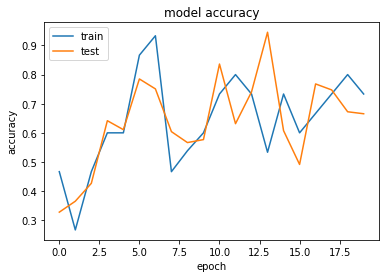

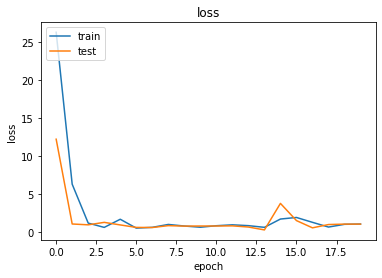

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
model.save('model4.h5')